# Univariate and Multivariate Optimization

The first two lectures of the course will serve to satisfy two objectives:

1. Acquaint students with the Python programming language
2. Review an important class of statistical computing algorithms: *optimization*

For some of you, one or both of these topics will likely be review. 

Let's begin by importing the packages we will need for this section.

> ### Import statements
> Much of Python's power resides in **modules**, either those included in base Python or from third parties, which contain functions and classes that provide key functionality for specialized tasks. We will import several of these modules, here to enable us to more easily peform scientific computing tasks, such as linear algebra, data manipulation, and plotting. The `import` clause will bring the module into the current session.
> Here we also create **aliases** for each module, so that they may be accessed more easily.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> For example, the `seaborn` package provides some high-level plotting capability. Here, we will call the `set_context` function from `seaborn`, which allows us to adjust the size of the labels, lines, and other elements of plots. The `'notebook'` argument tells `seaborn` to set these elements to be suitable for display within a Jupyter Notebook.

In [2]:
# Set some Seaborn options
sns.set_context('notebook')

## Optimization

Optimization is the process of finding the *minima* or *maxima* of a function. Consider a function:

$$f: \mathbf{R} \rightarrow \mathbf{R}$$

where $f',f''$ are continuous. A point $x^*$ is a *global* maximum if:

$$f(x) \le f(x^*) \, \forall \, x$$

or a *local* maximum if:

$$f(x) \le f(x^*)$$ 
$$\forall \, x:|x-x^*| \lt \epsilon$$

Necessary conditions:

1. $f'(x^*) = 0$
2. $f''(x^*) \le 0$ (sufficient if $f''(x^*) \lt 0$)

We will consider **local search** methods that generate a series of values that converge to the maximum:

$$x_0, x_1, x_2, \ldots \rightarrow \text{argmax}(f)$$

## Example: Maximum Likelihood

**Maximum likelihood** (ML) is an approach for estimating the parameters of statistical models. The resulting estimates from ML have good theoretical properties, so it is a widely-used method. 

There is a ton of theory regarding ML. We will restrict ourselves to the mechanics here.

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i | \theta)$$
</div>

> ### Random number generation
> The `numpy` module contains a `random` submodule with functions for generating random values from several important probability distributions. For example, if we want to generate 100 values from a **Poisson distribution** with a mean of 5, we can make the following function call:

In [3]:
y = np.random.poisson(5, size=100)

> The variable `y` is now the label associated with the resulting 100 values that we have sampled. They are stored in a data structure called an `ndarray`.

In [4]:
type(y)

numpy.ndarray

> We can arbitrarily acces values of this array by **indexing** them, specifying values or ranges of values within square brackets. For example, to get the first value:

In [5]:
y[0]

3

> Notice Python begins indexing values starting at zero, rather than one. To extract a sub-array, we can use a *slice*, denoted by the boundaries of the sub-array separated with a colon:

In [6]:
y[0:10]

array([3, 4, 6, 5, 6, 6, 4, 3, 6, 3])

Let's plot a histogram of the sampled values:

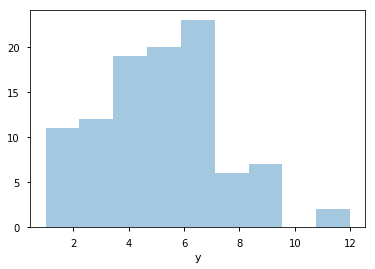

In [7]:
sns.distplot(y, kde=False, axlabel='y');

The product $\prod_{i=1}^n Pr(y_i | \theta)$ gives us a measure of how **likely** it is for the parameters $\theta$ to have generated values $y_1,\ldots,y_n$. Maximum likelihood fitting consists of choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. We call this function the *likelihood function*, because it is a measure of how likely the parameter values are if the model is true; that is, "Given these data, how likely is this model?"

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$.

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

So, for any given value of $y$, we can calculate its likelihood.

> ### Functions
> We can specify our own functions using the `def` clause. The function has three components:
> * name
> * arguments
> * body
>
> If the function is meant to provide output when called, a `return` statement must be specified.

In [8]:
def poisson_like(x, lam): 
    return np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

> Let's try calling our function with two arbitrary values for the Poisson mean parameter `lam` and a particular `value` we want the likelihood value returned for:

In [9]:
lam = 6
value = 10

poisson_like(value, lam)

0.041303093412337726

Or, for numerical stability, the log-likelihood:

In [10]:
poisson_loglike = lambda x, lam: -lam + np.log(lam**x) - np.log(np.arange(x)+1).sum()

poisson_loglike(value, lam)

-3.1868178807949654

> ### `lambda` functions
> A useful Python idiom is the `lambda` function. This is a shorthand that allows one-line functions to be specified anonymously.

The **joint** log-likelihood is then just the sum of the likelihood calculated for all of the data.

In [11]:
np.sum(poisson_loglike(yi, lam) for yi in y)

-225.26703805055806

> ### Comprehensions
> Notice how we looped over all of the values of `y` in the above. This is another Python idiom called a `comprehension`, which is a construct that allows sequences to be built from other sequences. The most common is a **list comprehension**:
>
>      [x**2 + 5 for x in x_values]
> In our likeihood calculation, the comprehension results in a **generator** that yields values as they are needed, rather than when the data structure is created.
> ![list comprehension](images/listComprehensions.gif)

We can compare this value with the log-likelihood for a different value of the parameter.

In [12]:
lam = 8
np.sum(poisson_loglike(yi, lam) for yi in y)

-276.82308866543917

We can plot the likelihood function for any value of the parameter(s):

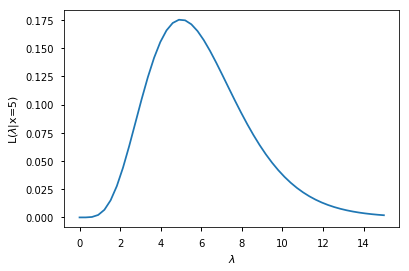

In [13]:
# Create a linear space of values between 0 and 15
lambdas = np.linspace(0,15)

# A data point
x = 5

plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x));

How is the likelihood function different than the probability distribution (or mass) function? The likelihood is a function of the parameter(s) **given the data**, whereas the PDF (PMF) returns the probability of data given a particular **parameter value**. 

Here is the PMF of the Poisson for $\lambda=5$.

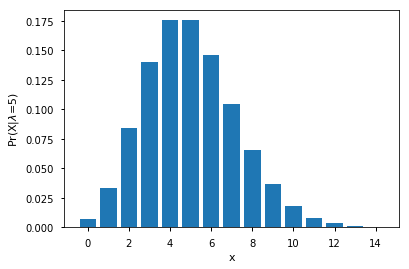

In [14]:
lam = 5
xvals = np.arange(15)

plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)');

Why are we interested in the likelihood function? 

A reasonable estimate of the true, unknown value for the parameter is one which **maximizes the likelihood function**. So, inference is reduced to an optimization problem.

### Example: Nashville rainfall data

Consider again the Nashville precipitation data (`nashville_precip.txt`), in your data directory, which records the monthly rainfall from 1871 to 2011. Since this is continuous, positive data, it may be possible to model it using a Gamma distribution. If so, we need to maximize:

$$\begin{align}l(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

where $n = 2012 − 1871 = 141$ and the bar indicates an average over all *i*. We choose $\alpha$ and $\beta$ to maximize $l(\alpha,\beta)$.

Notice $l$ is infinite if any $x$ is zero. We do not have any zeros, but we do have an NA value for one of the October data.

### Finding the MLE

To find the maximum of any function, we typically take the *derivative* with respect to the variable to be maximized, set it to zero and solve for that variable. 

$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = n\left(\log(\beta) -\frac{\Gamma(\alpha)'}{\Gamma(\alpha)} + \overline{\log(x)}\right) = 0$$

So, in general we are finding:

$$l(\theta) = \left(\frac{d\theta}{d\theta_1}, \cdots, \frac{d\theta}{d\theta_n}\right) = \mathbf{0}$$

Thus, we seek the root of the score equation.

In Python, we can use Sympy to obtain the first derivative of the gamma likelihood with respect to $\beta$, using symbolic differentiation.

In [15]:
# via Sympy
import sympy as sy

a, b, x = sy.symbols('a b x')
gamma_dist = (a-1)*sy.log(x) - x*b + a*sy.log(b) - sy.log(sy.gamma(a))
sy.diff(gamma_dist, b)

a/b - x

Which can be solved as $\beta = \alpha/\bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$

This has no closed form solution. We must use ***numerical optimization***!

## Bisection method

The bisection method performs numerical root-finding for univariate problems. It works on continuous functions on $[a_0, b_0]$ where:

$$f^{\prime}(a_0)f^{\prime}(b_0) \le 0$$

which implies that there is a local maximum (minimum) between the two values somewhere.

The initial interval $[a_0, b_0]$ is arbitrary, as long as the above condition is met.

The algorithm iteratively shrinks the interval $[a_i,b_i]$, by subdividing it and retaining the subinterval for which the above condition is still true. If there are multiple optima, bisection will only find one of them.

Due to a number of factors, including rounding error in floating point calculations, iterative procedures can easily run indefinitely. To avoid this, we specify a **stopping rule** that halts the algorithm based on some pre-defined convergence criteria.

Since we are searching for a root, one approach is to monitor the convergence of $f^{\prime}((a_i + b_i)/2)$ to zero. However, when the likelihood is very flat, there can be very large changes in the estimated value even when $f^{\prime}(x)$ is small. Instead, we should monitor the **difference** in values from one iteration to the next.

> **absolute convergence criterion**:
> 
> $$| x_{i+1} - x_{i} | \lt \epsilon$$
> 
> where $\epsilon$ is a chosen tolerance.
> 
> **relative convergence criterion**:
> 
> $$\frac{| x_{i+1} - x_{i} |}{|x_{i}|} \lt \epsilon$$
> 
> In general:
> 
> * if values of $x$ are orders of magnitude larger (smaller) than $\epsilon$, absolute convergence may stop too late (soon)
> * if the solution is too close to zero, relative convergence may become unstable


Note that for the bisection method:

$$b_t - a_t = \frac{b_0 - a_0}{2^t}$$

which means that for a given $\epsilon$, we require: 

$$t > \log_2\left(\frac{b_0 - a_0}{\epsilon}\right)$$

Reducing $\epsilon$ by a factor of 10 means increasing $t$ by $\log_2(10) \approx 3.3$.

It is also wise to place an absolute limit on the number of iterations, in case the algorithm diverges or cycles.

> ### `while` loop
> In the function below, we employ a `while` loop, which executes the subsequent code block until the specified condition is no longer true.

> ### Functions as arguments
> Notice that one of the arguments to `bisection` is expected to be a function (the function we are trying to find the root of). In Python, functions are first-class objects, and can therefore be assigned to variables, deleted, passed as an argument, or anything else you might do with another object, such as an array of data.

In [16]:
class ConvergenceError(Exception): pass

def bisection(func, a, b, tol=1e-9, max_iter=100):

    # Check initial values
    if a >= b:
        raise ValueError('Right value must be larger than left')
    
    fa, fb = func([a, b])
    
    if fa*fb > 0:
        raise ValueError('No maximum between specified values')
    
    i = 0
    while (b - a) > tol:
        
        # More stable than c = (b + a)/2.
        c = a + (b - a)/2.
        fc = func(c)
        
        if fa*fc < 0:
            b,fb = c,fc
        else:
            a,fa = c,fc
            
        i +=1
        
        if i == max_iter:
            raise ConvergenceError('The algorithm did not converge in {0} iterations'.format(max_iter))
        
    return(a + (b - a)/2., i)

> ### Errors and Exceptions
> Information about errors when running Python code is provided using an `Exception` object. An **object** is a particular instance of a **class**, which is a programming abstraction that aggregates related functions and attibutes in a single data structure. We are using a particular **subclass** of `Exception` to denote when we have a bad argument value passed to our function.
>
> Notice that we are deliberately triggering errors in this function, via the `raise` clause. Why would we want to do this?
>
> We also create a special subclass of the built-in `Exception` class to be used when our algorithm fails to converge, which we will call a `ConvergenceError`.

To apply this algorithm to the precipitation data, we need a function for the derivative of the log likelihood with respect to one of the parameters, in this case, `beta`.

First, let's import our data.

> ### Reading tabular data
> Our first use of `pandas` will be to import data from a text file. Pandas includes several `read_` functions corrsponding to common file formats. In this case, we are importing a table of precipitation values, stored as a plain text file with values separated by varying numbers of whitespace characters. The `sep` argument below accepts any character that might be used as a separator, as well as a **regular expression**, which we use here.

In [17]:
precip = pd.read_table("../data/nashville_precip.txt", sep='\s+')

Since maximizing the likelihood conditions on the data, we can calculate a couple of values ahead of time, namely the log-mean of the data and the mean of the log-transformed values.

> ### Method chaining
> Notice below that calculations are performed by **chaining** method calls one after the other, using the "dot notation". For `log_mean`, we first calculate the mean, and apply the `log` function to that value as soon as it is returned. We only assign a value to a parameter when the final quantity of interest is returned.
>

In [18]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Here is an advanced example of method chaining that reshapes, resamples and summarizes a diseaase outbreak monitoring dataset in one line, using method chaining:

```python
confirmed_counts_2w = (confirmed_data
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()
                        .reindex(dates_index)
                        .fillna(0)
                        .resample('2W')
                        .sum()
                        .pipe(check.is_shape, 
                              (28, len(age_groups))))
```

We will see more of this when we start using the `pandas` package for tabular data.

> ### SciPy functions
> The SciPy library is one of the core packages that make up the Python *scientific stack*. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization. Here, we are using its `psi` function, which is the derivative of the logarithm of the gamma function evaluated at whichever value is passed to it (also called the digamma function).

In [19]:
from scipy.special import psi

def dlgamma(m, month = 'Dec'): 
    return np.log(m) - psi(m) - log_mean[month] + mean_log[month]

To obtain reasonable starting points, there are a handful of strategies:

* plotting the function, and obtain a visual estimate
* preliminary estimates via other approximate solutions
* trial and error

Here, we will plot the function:

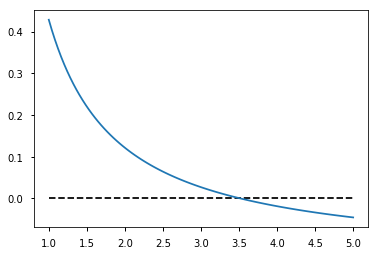

In [20]:
x = np.linspace(1, 5, 100)
y = dlgamma(x)

plt.plot(x, y)
plt.hlines(0, 1, 5, linestyles='--');

In [21]:
bisection(dlgamma, 2, 4, tol=1e-7)

(3.5189678966999054, 25)

## Convergence Order

We can quantify the *efficiency* of root-finding algorithms by calculating its **order of convergence**.

If an algorithm satisfies $\lim_{i \rightarrow \infty} \epsilon_i = 0$, then the parameter $\beta$ is the order of convergence according to:

$$\lim_{i \rightarrow \infty} \frac{|\epsilon_{i+1}|}{|\epsilon_{i}|^{\beta}} = c$$

for some constant $c$. Larger values of $\beta$ are the result of faster convergence.

Note that there is usually a tradeoff of speed vs. robustness.

The bisection method is unusual in that it does not meet the criterion for order of convergence, with the ratio above being possibly unbounded. In practice, it tends to exhibit approximately linear convergence.

## Fixed Point Iteration

Another method for finding roots computationally is *fixed-point iteration*. A **fixed point** of a function is a point at which the evaluation of the point equals the point itself. Mathematically, for some function $g:\mathbf{R} \Rightarrow \mathbf{R}$, a fixed point is:

$$a \in \mathbf{R}: g(a) = a$$

So, if we define our function $f$ as:

$$f(x) = c(g(x)-x)$$

then we can find the root of $f$ when we find the fixed point of $g$. Conversely:

$$g(x) = c_1f(x) + x$$

The method begins with an initial guess $x_0$, from which we generate $x_1 = g(x_0)$, then $x_2 = g(x_1)$, etc.

In general, this is a 1st-order recurrence equation:

$$x_{n+1} = g(x_{n})$$

We can show that $x_n \rightarrow a$ is a fixed point of $g$.

$$a = \lim_{n \rightarrow \infty} x_{n+1} = \lim_{n \rightarrow \infty} g(x_n)$$
$$ = g(\lim_{n \rightarrow \infty} x_n) = a$$

therefore, $a$ is a fixed point of $g$.

Unfortunately, this convergence does not always take place. For example, consider the following functions:

$$g_1(x) = x^{1.5}, \, g_2(x) = x^{0.75}$$

both $g_1, g_2$ have fixed points at 1 (by inspection), but $g_1$ diverges.

In general,

* the algorithm converges if $|g'(a)<1|$, and diverges otherwise.
* the initial value should be in the "neighborhood" of $x_0$ to guarantee convergence.

In practice, we may *converge* to $a$ without reaching it. We want to stop when $x_n$ is "close enough":

$$ |x_n - x_{n-1}| \le \epsilon$$

### Exercise: Gamma MLE

Implement a fixed point algorithm, and use it to calculate the gamma MLE for one of the months of precipitation in Nashville.

In [22]:
# Write your answer here

## Newton's Method

Bracketing methods like bisection, which bounds a root within a sequence of intervals that gradually decrease in length, are slow relative to other approaches. A much faster root-finding method is **Newton's method**. 

If we have a function $f$ that is twice-differentiable, we can approximate the root of its derivative using a Taylor series expansion:

$$f^{\prime}(x^*) \approx f^{\prime}(x_i) + (x^* - x_i)f^{\prime\prime}(x_i) = 0$$

We can approximate $f^{\prime}$ by its tangent at $x_i$, and then approximate the root of $f^{\prime}$ by the root of the tangent line:

> ### Plotting with `matplotlib`
> The illustrative diagram below shows how custom plotting can be implemented in `matplotlib`. Standard plots can be annotated with text and shapes, using the low-level API.

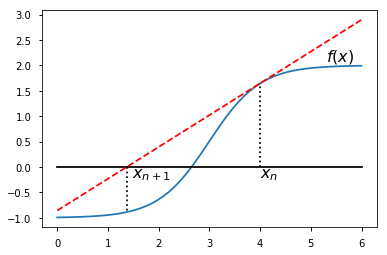

In [23]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16);

If we solve for $x^*$, this gives:

$$x^* = x_i - \frac{f'(x_i)}{f''(x_i)}$$

This result is just another approximation, however, so this formula is iterated as:

$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}$$

In the specific case of a MLE problem, this becomes:

$$\theta_{i+1} = \theta_i - \frac{l'(\theta_i)}{l''(\theta_i)}$$

### Convergence

Using Newton's algorithm, $x_i \rightarrow x^*$ quickly, provided:

1. $f'(x^*)=0$
2. $f''(x^*)<0$
3. $f''$ is *Lipschitz-continuous* in the neighborbood of $x^*$

> Lipschitz continuous if there exists a $k$ such that:
>
> $|f''(x) - f''(y)| \le k|x-y| \, \forall \, x,y$

The following implements Newton's method in Python:

> ### Docstrings
> An easy way to document functions and classes in Python is to include a **docstring**. Any string added directly following the declaration of the function or class is assumed to be documentation, and is reported when `help` is called on the object. Try it!

In [24]:
def newt(f, f_prime, x0, tol=1e-9, max_iter=100, **kwargs):
    """
    Newton-Raphson algorithm for solving f(x) == 0
    
    Parameters
    ==========
    f: function
        a function of a single variable, x.
    f_prime: function
        a function that returns the derivative of f at x.
    x0: float 
        the initial guess at the fixed point.
    tol: float, optional
        minimum distance of consecutive guesses before algorithm stops
        (default=1e-9).
    max_iter: int, optional 
        maximum number of iterations to converge to tolerance before
        algorithm stops (default=100).
        
    Returns
    =======
    x: float
        Final value of algorithm
    """
    
    # Initialize
    x = x0
    fx, fpx = f(x, **kwargs), f_prime(x, **kwargs)
    i = 0
    
    # Loop until conditions met
    while (abs(fx) > tol) and (i < max_iter):
        
        x -= fx/fpx
        fx, fpx = f(x), f_prime(x)
        i += 1
                
    if abs(fx) > tol:
        raise ConvergenceError('Algorithm failed to converge')

    return x

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest. We defined the first derivative above; the second derivative is as follows:

In [25]:
from scipy.special import polygamma

dl2gamma = lambda m, **kwargs: 1./m - polygamma(1, m)

`polygamma` is a complex function of the digamma function that results when you take the nth derivative of that function. So, here `polygamma(1, m)` is the first derivative of the digamma, which is the second derivative of the original gamma.

In [26]:
# Alpha MLE for December
alpha_mle = newt(dlgamma, dl2gamma, 2, month = 'Dec')
alpha_mle

3.5189679152158253

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [27]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.84261607547835782

Newton's method is also available to us via SciPy:

In [28]:
from scipy.optimize import newton

For most common distributions, SciPy also includes methods for fitting via MLE:

In [29]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.2427517753152308, 0.65494604470188622, 1.570073932063466)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution. If we set the location parameter to zero:

In [30]:
scipy_params = gamma.fit(precip.Dec, floc=0.)
scipy_params

(3.5189679152399753, 0.0, 1.1867801114824814)

To complicate things further, SciPy's gamma distribution uses a parameterization that employs the inverse of beta for its scale parameter.

In [31]:
1./scipy_params[-1]

0.84261607548414119

### Example

This animation illustrates how Newton's method estimates the minimum of a simple polynomial function, $2x^4 + 3x^3 + 3$.

It requires the installation of Jake Vanderplas' `JSAnimation` package:

In [32]:
from matplotlib import animation

In [33]:
try:
    from JSAnimation.IPython_display import display_animation
except ImportError:
    !pip install git+https://github.com/jakevdp/JSAnimation.git
    from JSAnimation.IPython_display import display_animation
    
from matplotlib import animation

  Cloning https://github.com/jakevdp/JSAnimation.git to /private/var/folders/g6/cz6ytzxs7p18g95z4f47_tww0000gn/T/pip-gaeztk_c-build
  Running setup.py install for JSAnimation ... done


First, we will need a few functions: here is the polynomial itself, along with the first two derivatives, which we will use to calculate the first two terms of the Taylor series:

In [34]:
f = lambda x: 2 * x**4 + 3 * x**3 + 3 

df = lambda x: 8 * x**3 + 9 * x**2

ddf = lambda x: 24 * x**2 + 18*x

taylorf = lambda x, dx: f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

The following is a special type of function called a **generator**. Rather than simply return a value, it returns a generator object that returns the next value in a series of calculated values as they are needed, using the `yield` statement in place of `return`. 

Here we use a generator to implement Newton's method.

> ### global variables
> The `global` clause declares a variable inside a code block to be available in enclosing scopes. They should be used sparingly!

In [35]:
def generator():
    global x
    while True:
        yield x
        delta = df(x) / float(ddf(x))
        if abs(delta) < 1e-10:
            return
        x = x - df(x) / float(ddf(x))
        yield x

This function will update the locations and text of animated objects

In [36]:
def update(ignore): #uses global variable x
    global x
    taylorCurve.set_data(x+dxs, taylorf(x,dxs))
    spot.set_data(x,f(x))
    dashedLine.set_data((x,x), (y0,y1))
    text.set_x(x + 0.1)
    text.set_text(str(np.round(x, 3)))
    return (taylorCurve, spot, dashedLine, text)

Let's aribitrarily initialize the value of the minimum:

In [37]:
x = 1.5 

Finally, we set up the plot and animate it:


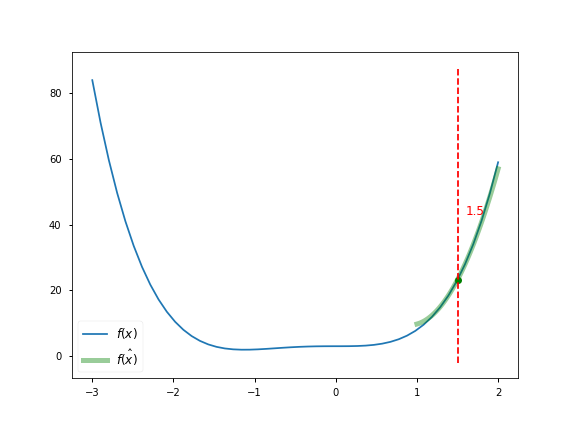
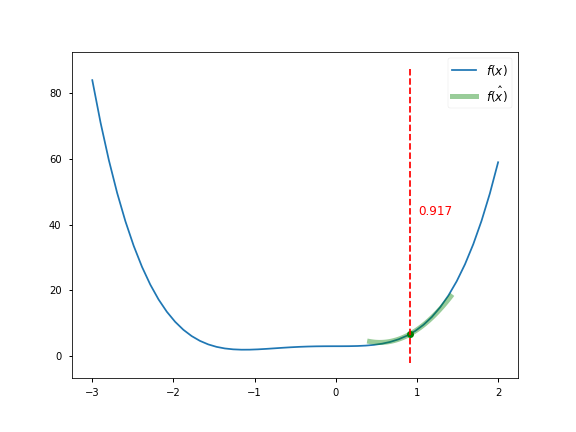
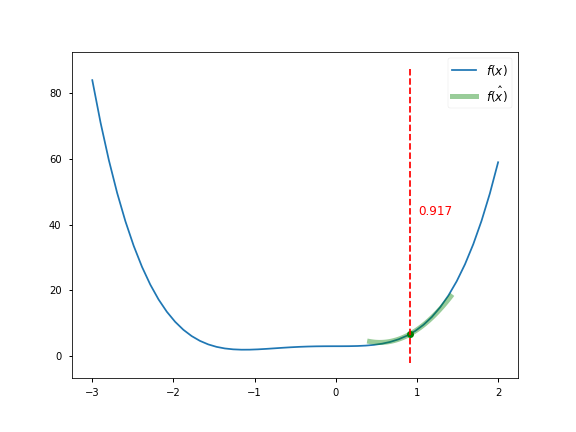
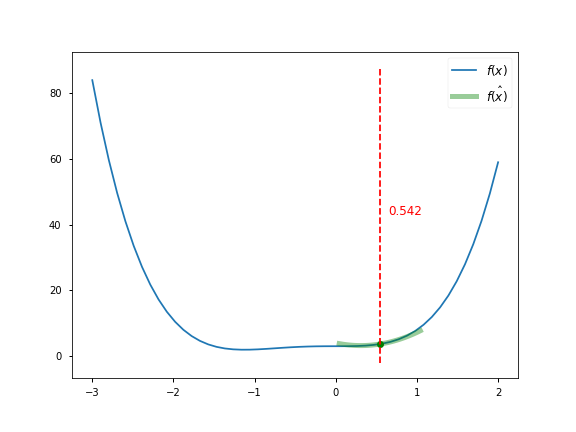
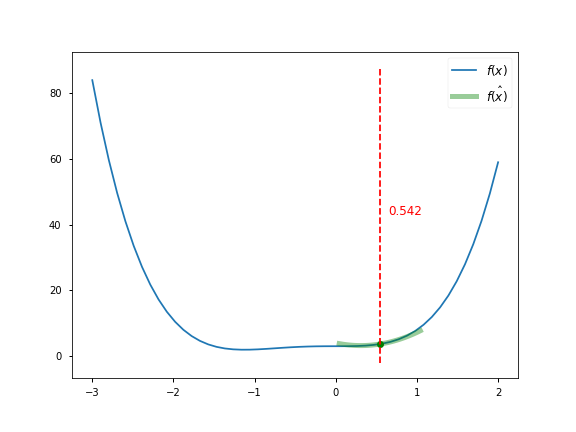
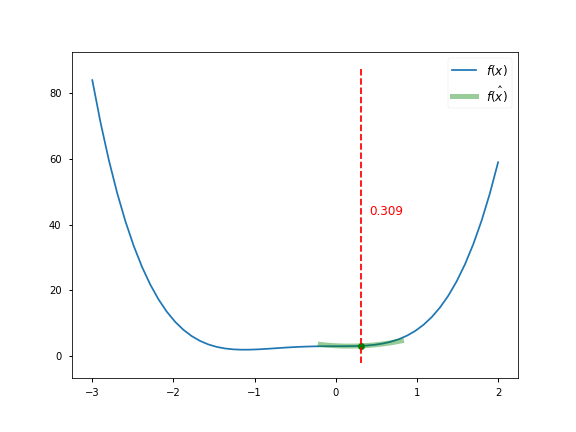
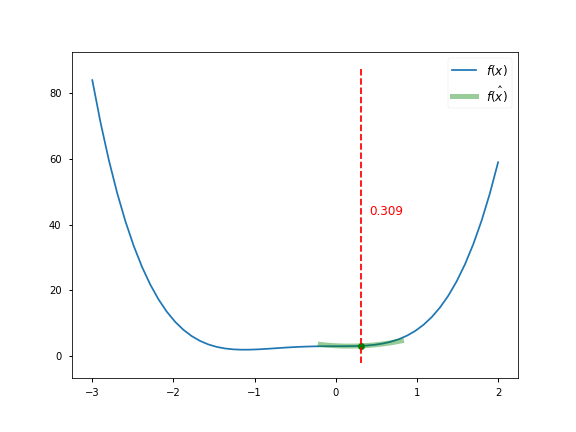
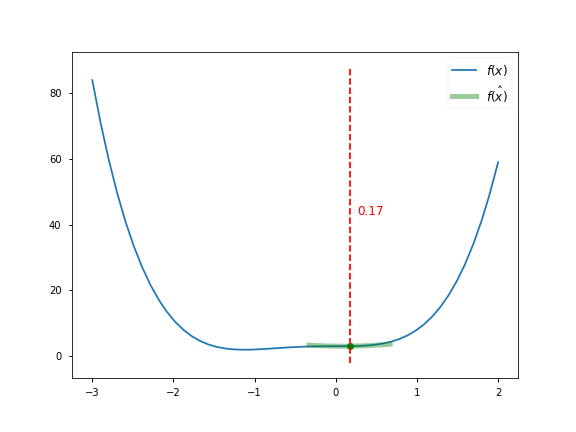
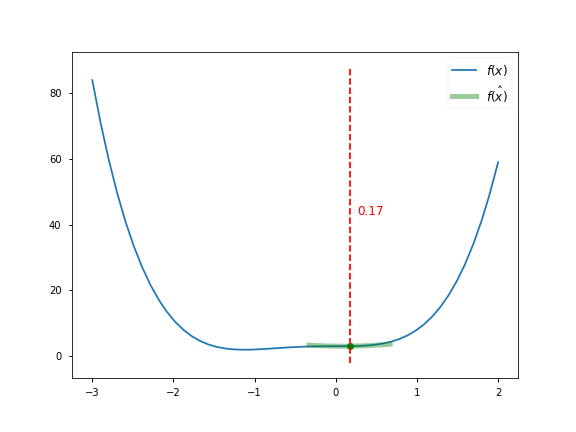
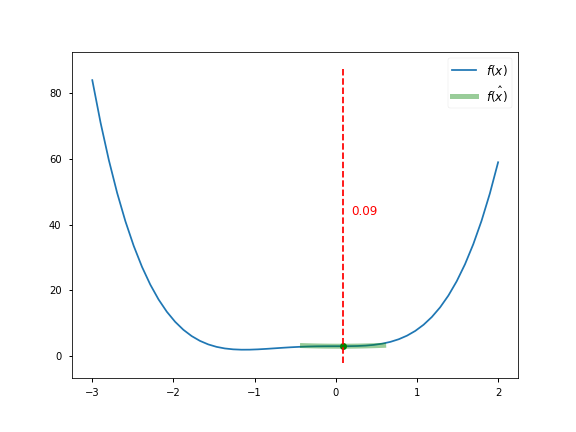
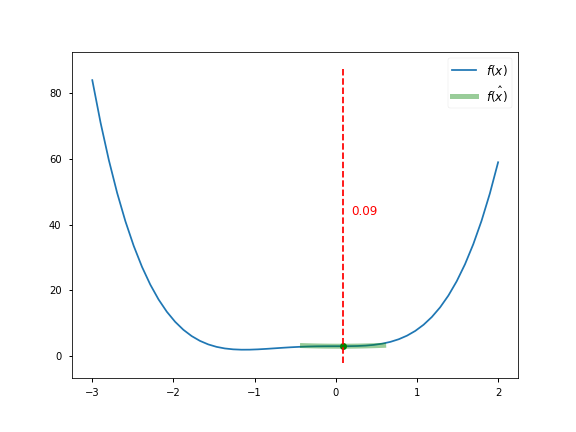
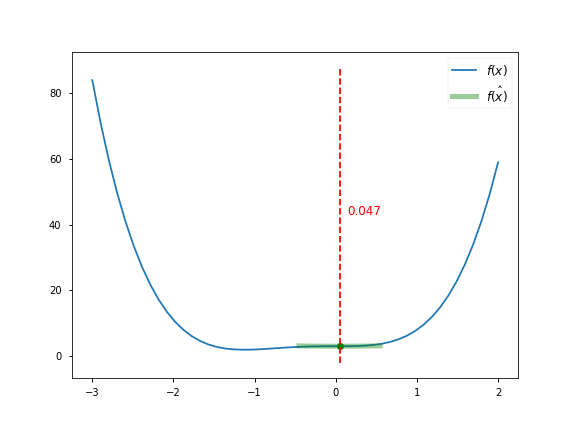
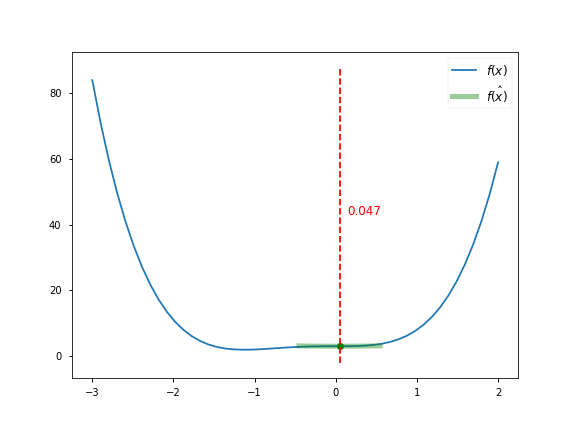
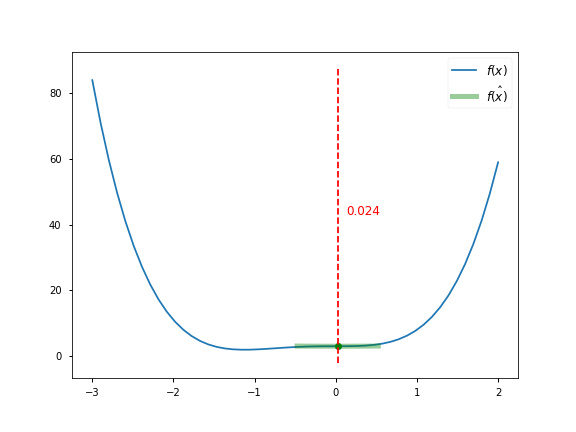
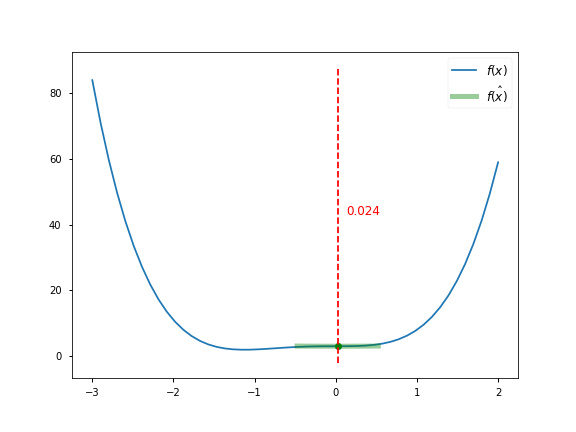
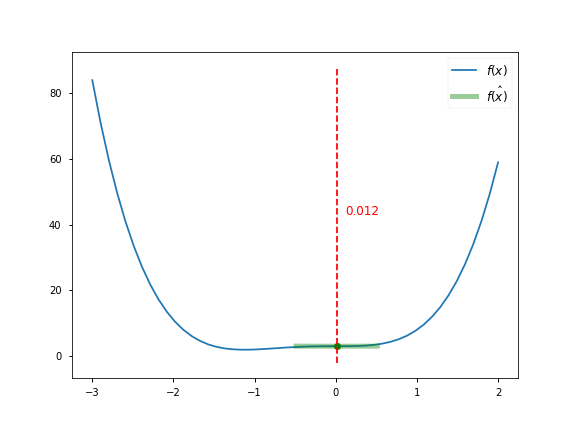
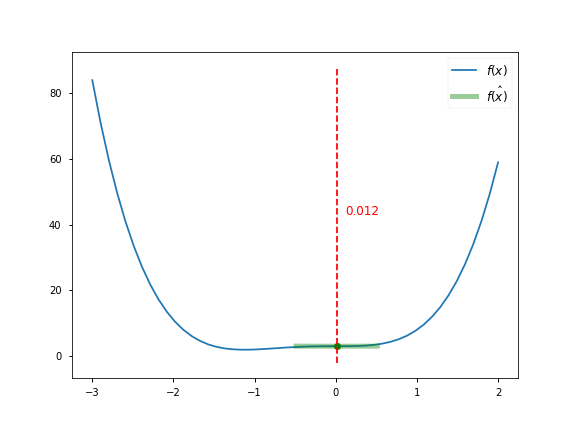
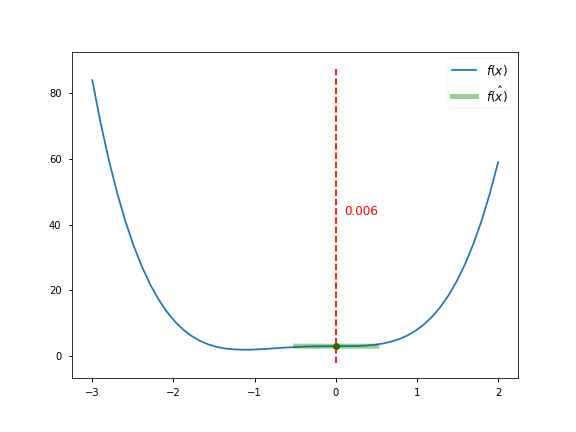
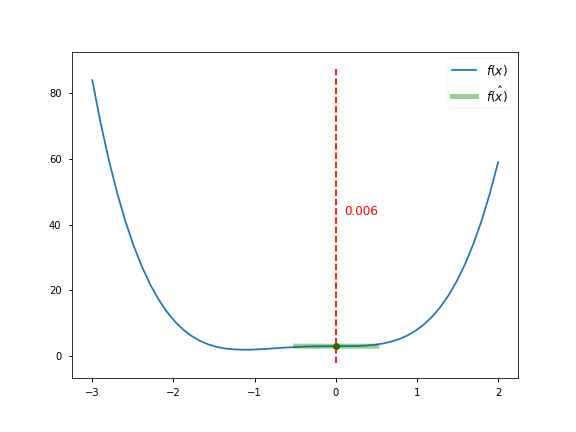
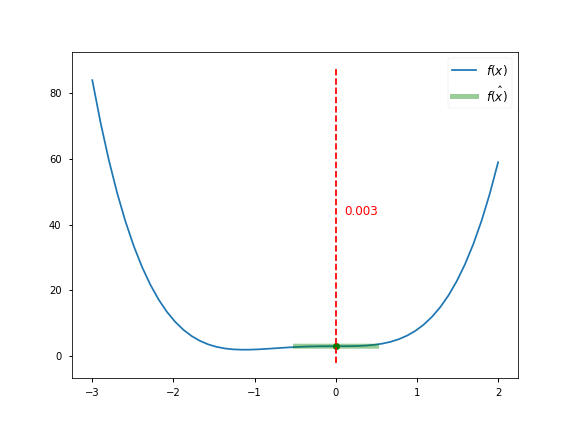
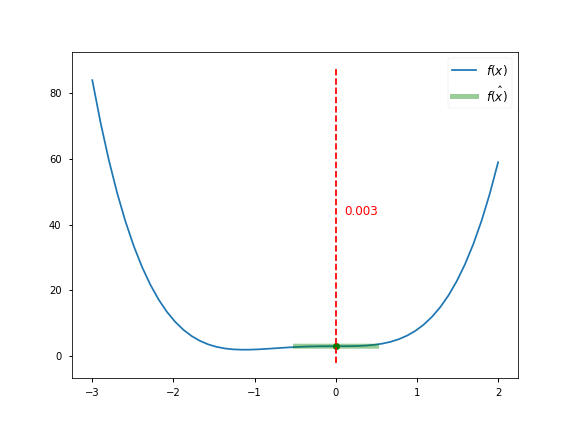
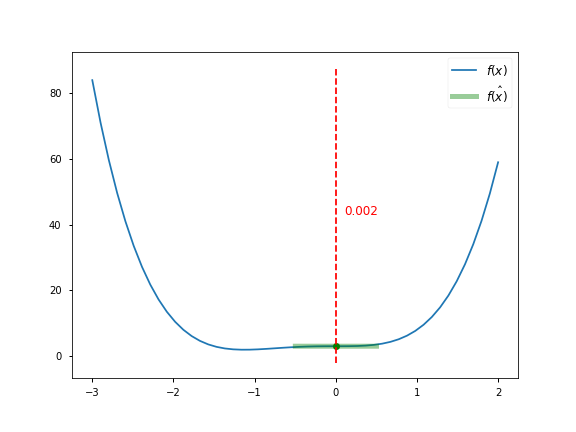
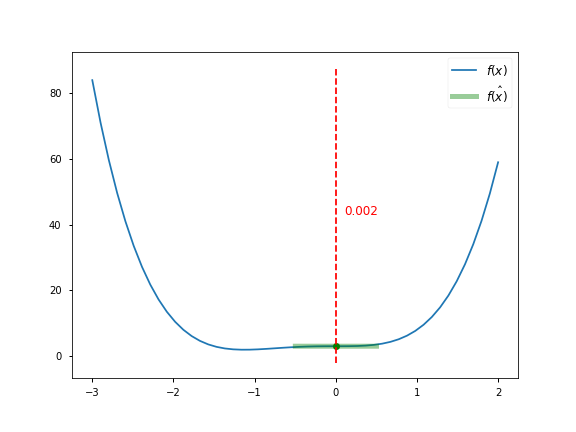
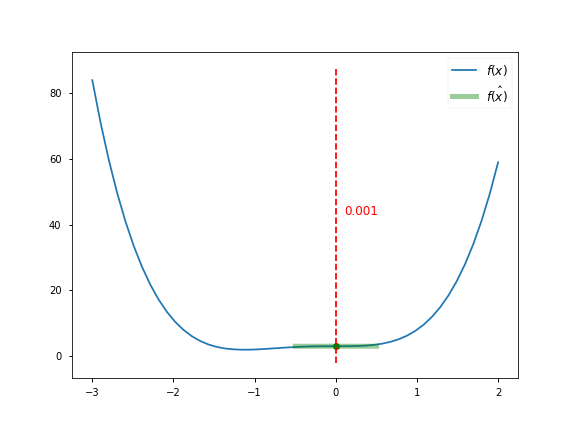
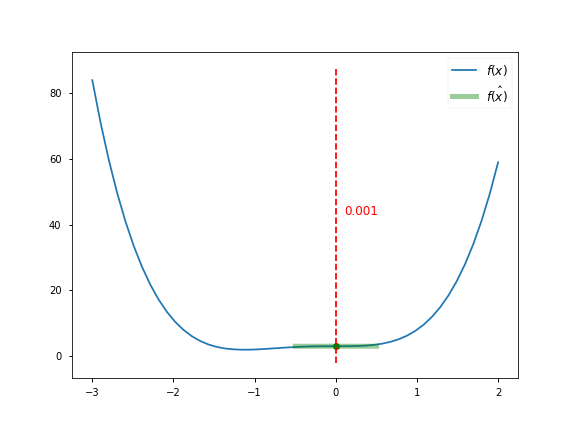
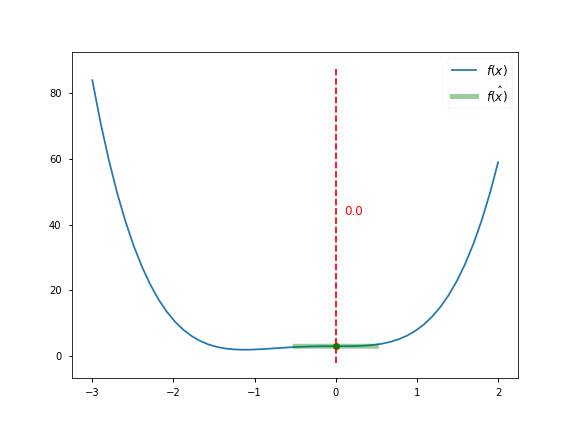
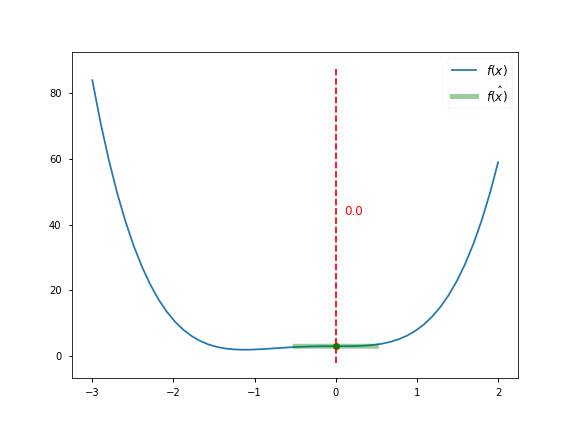
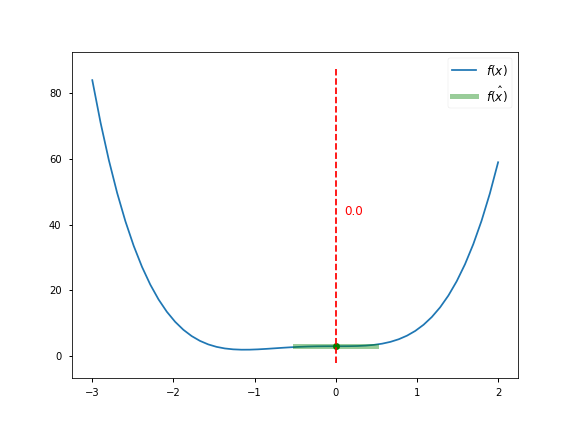
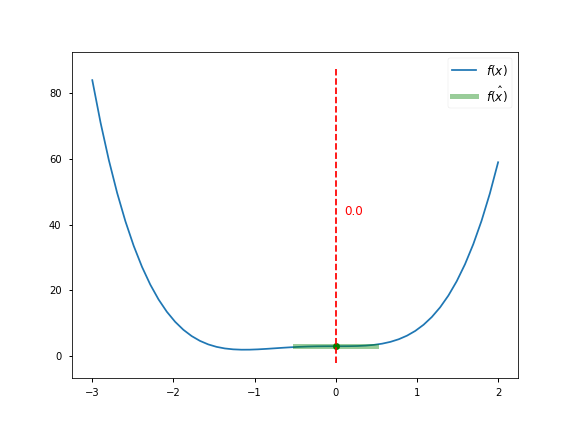
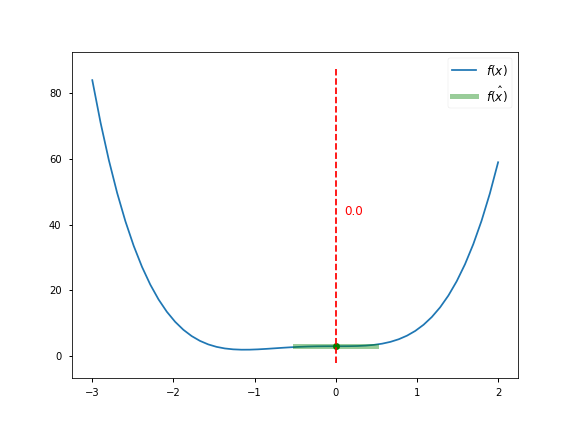
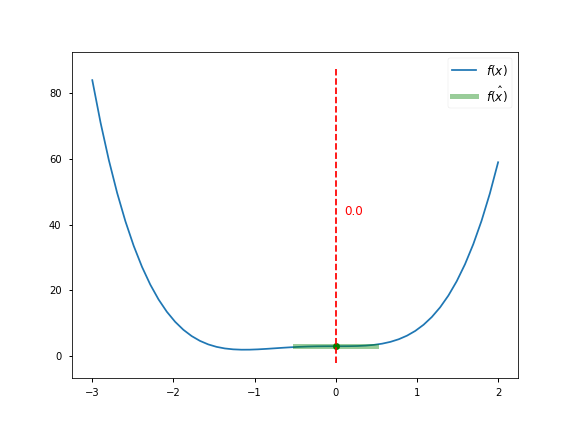
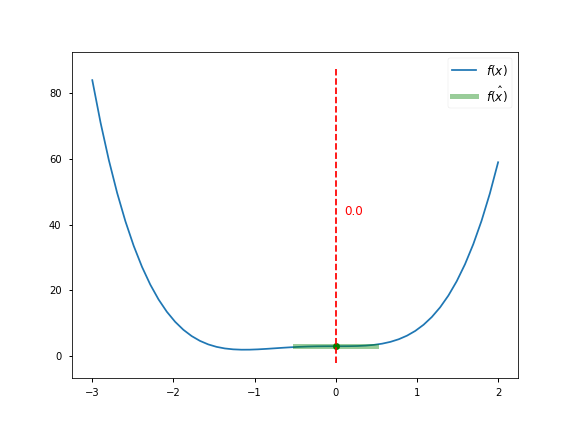
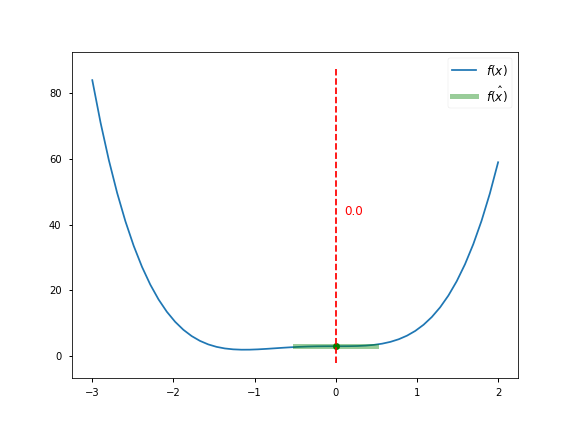
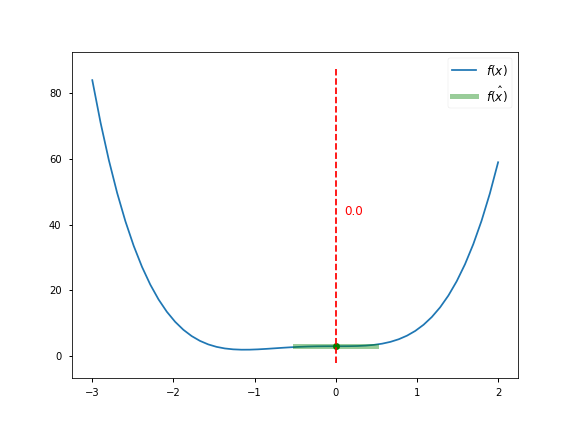
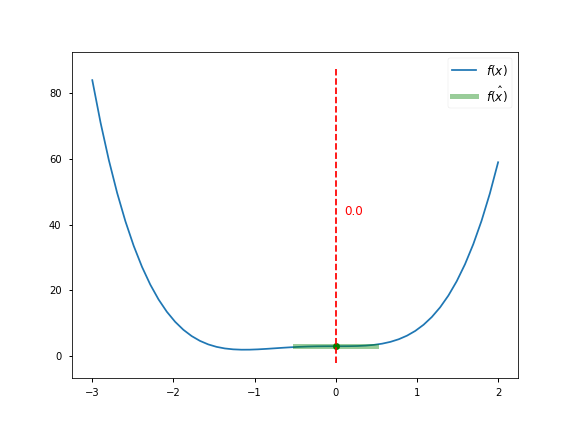
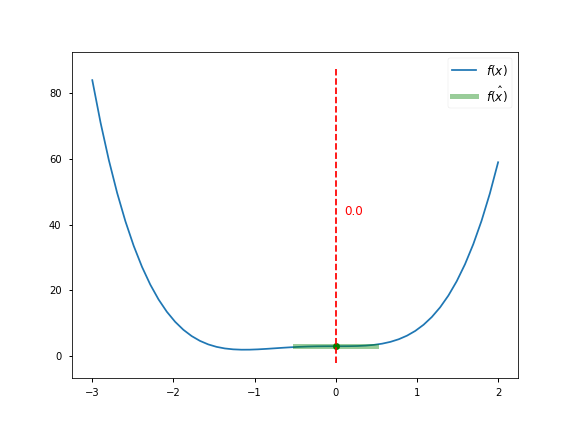
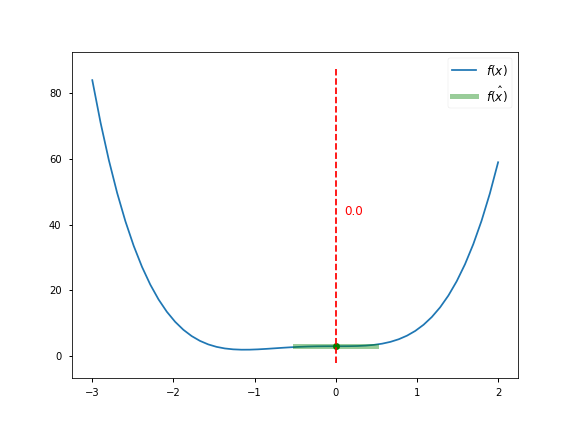
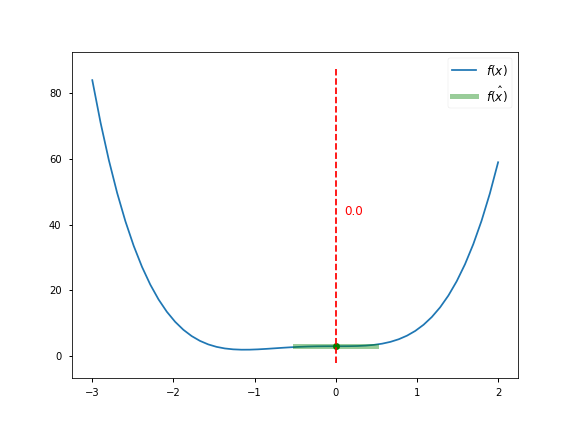
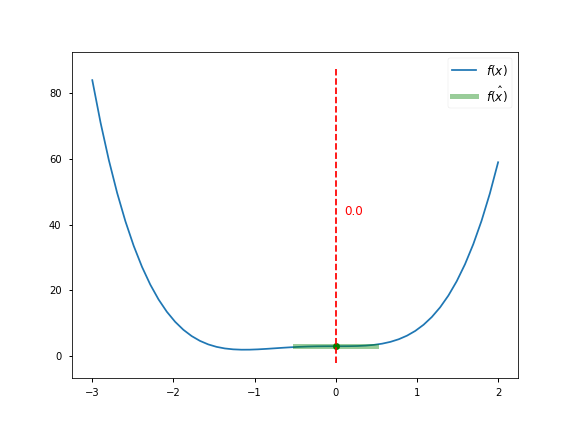
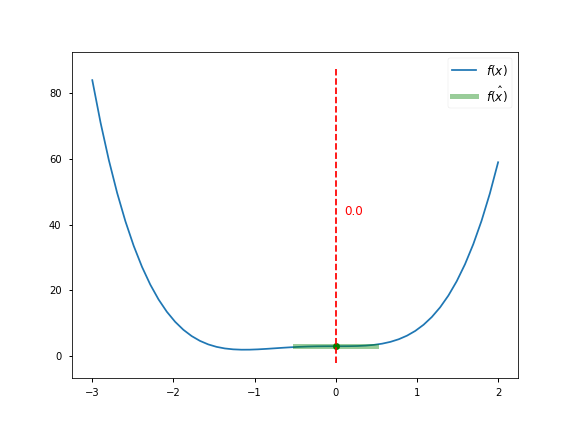
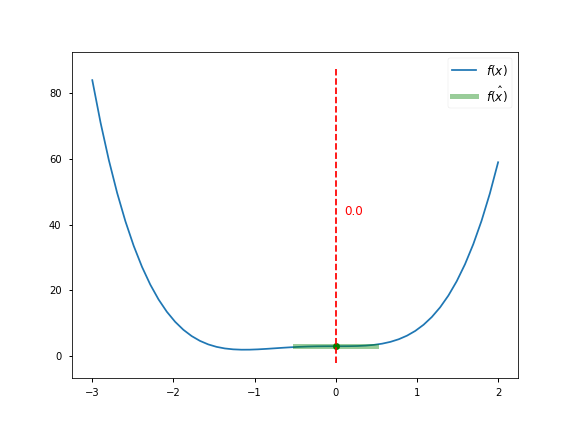
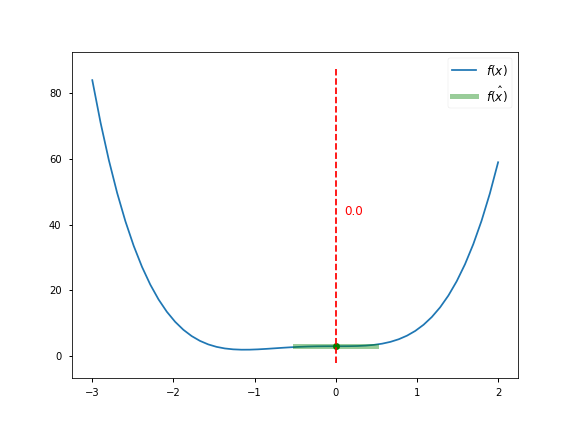
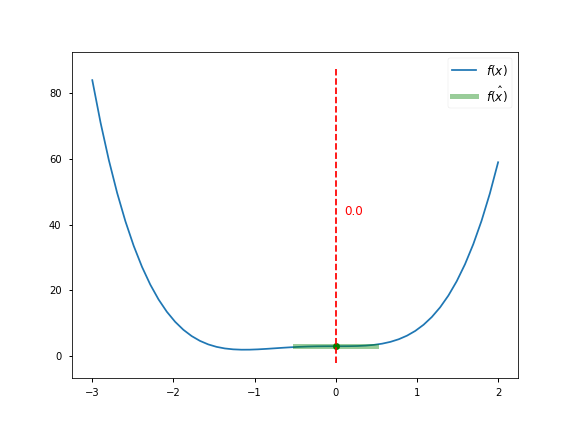
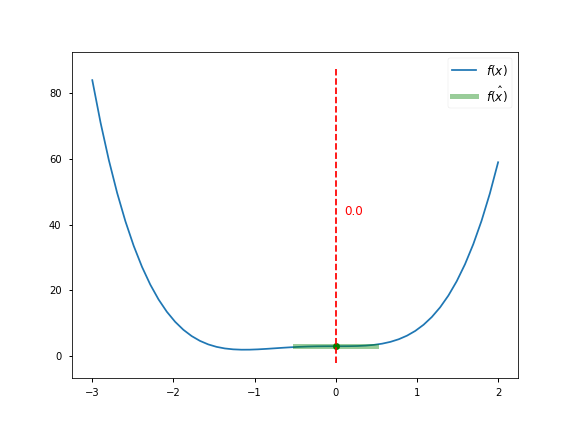
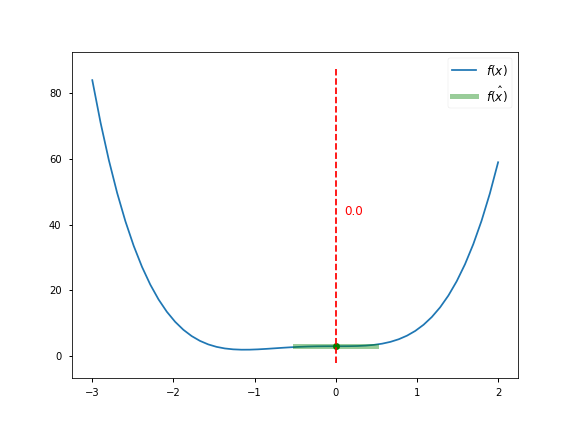
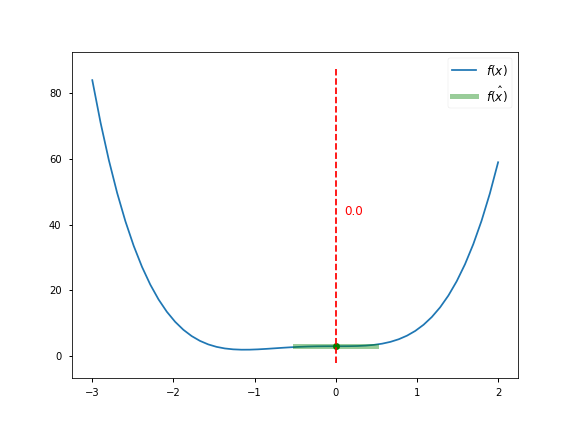
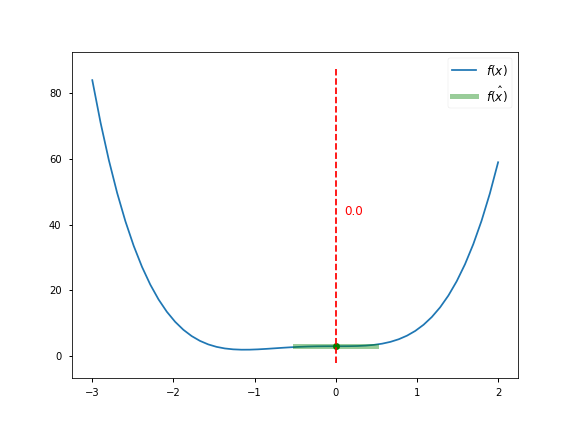
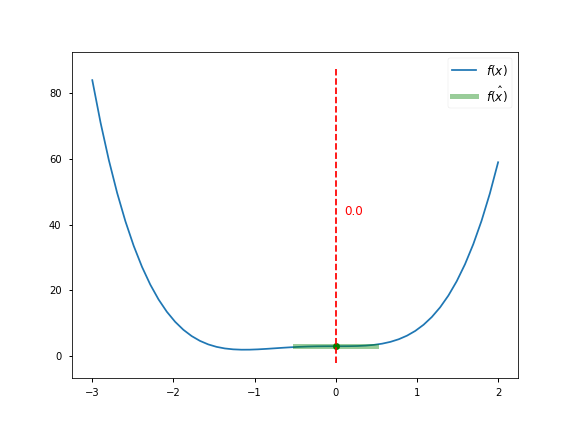
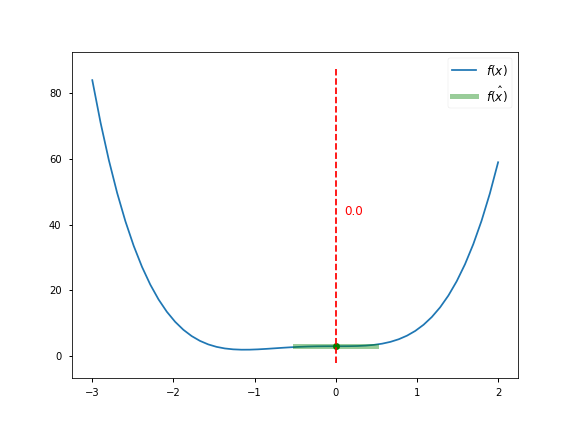
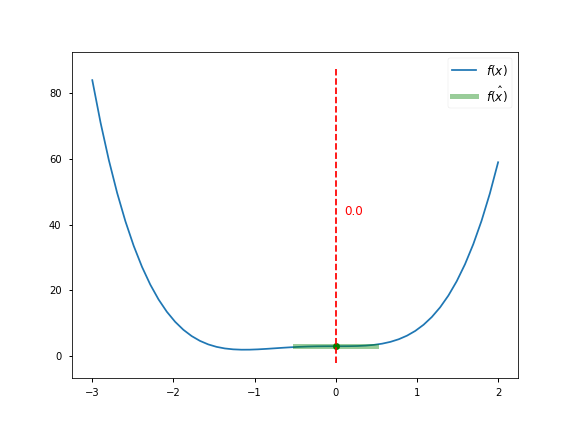
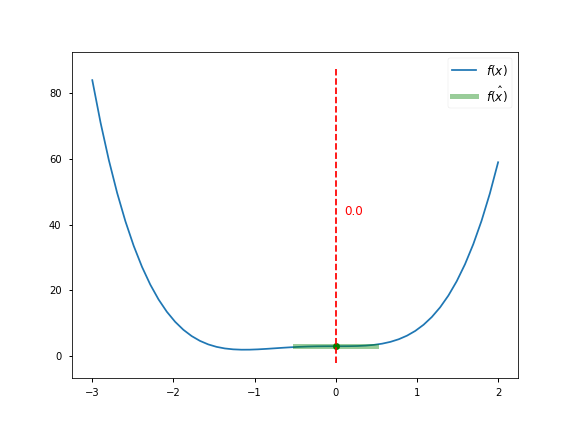
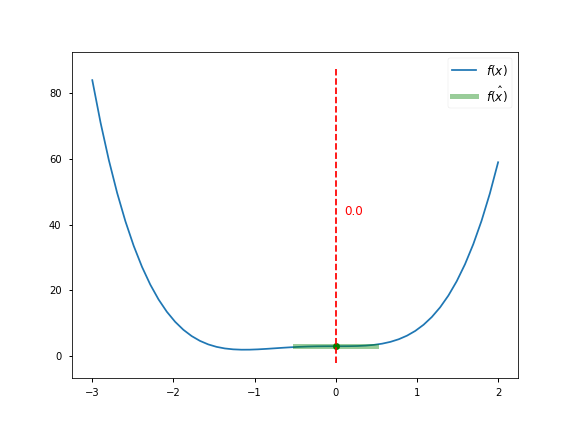
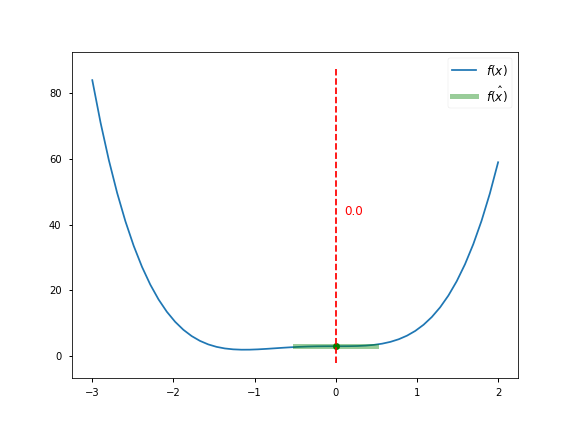
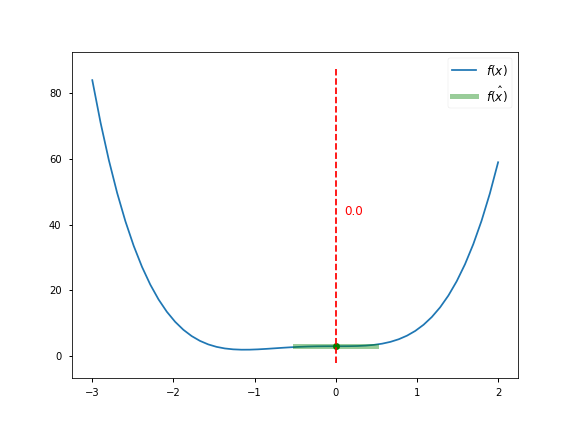
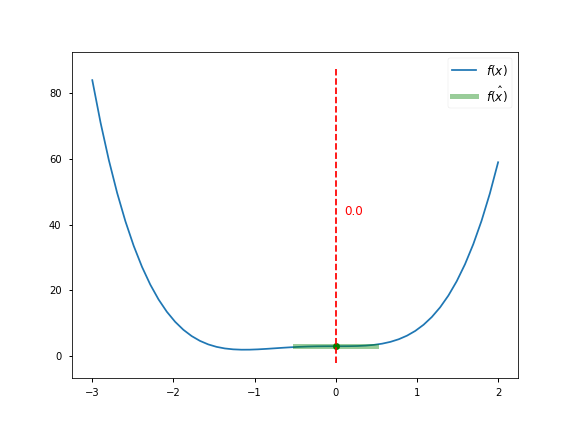
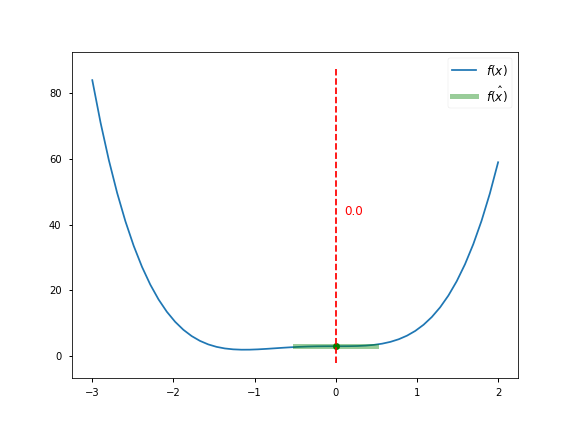
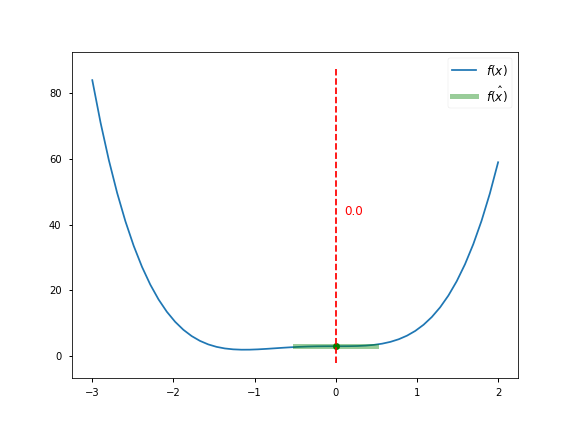
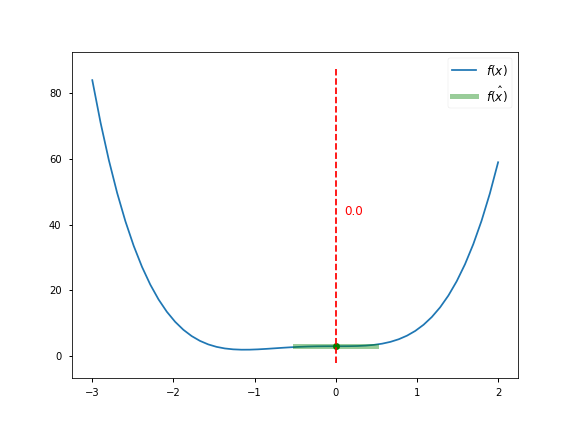
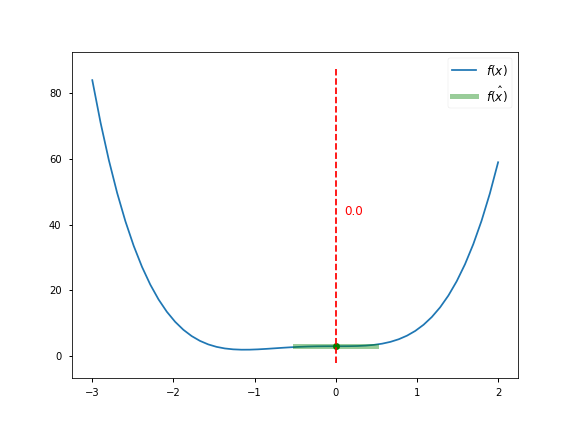
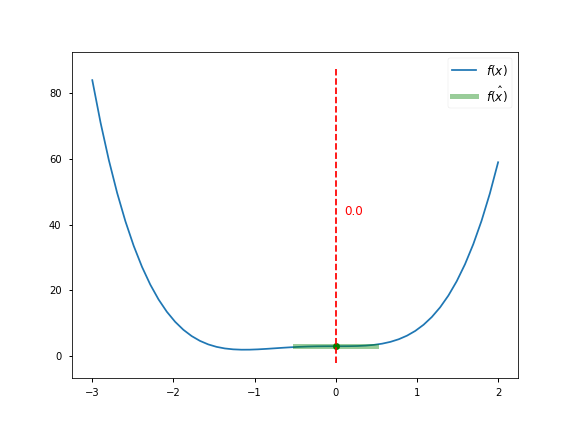
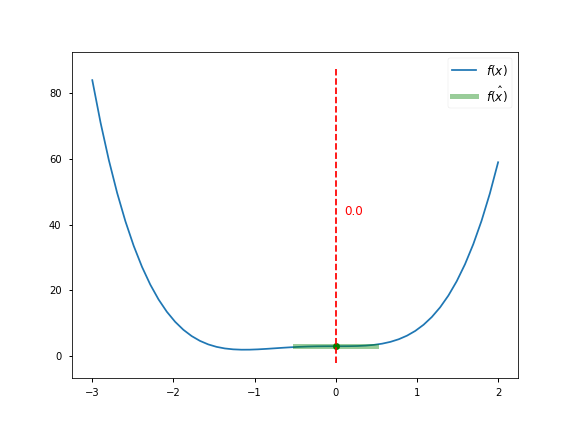
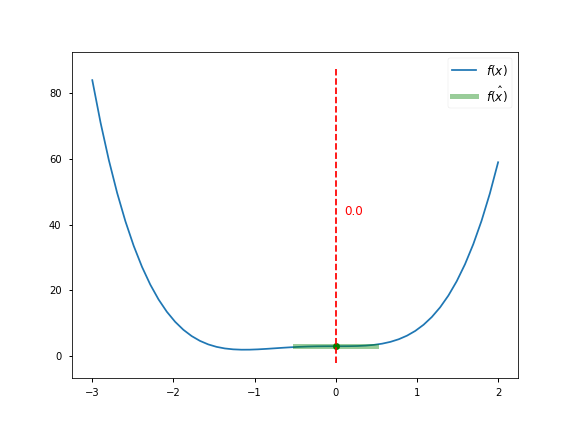
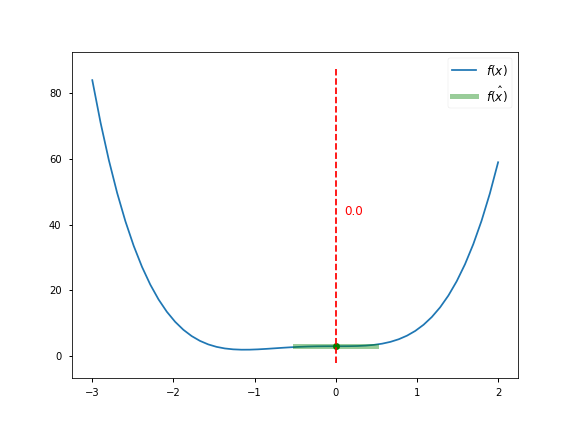
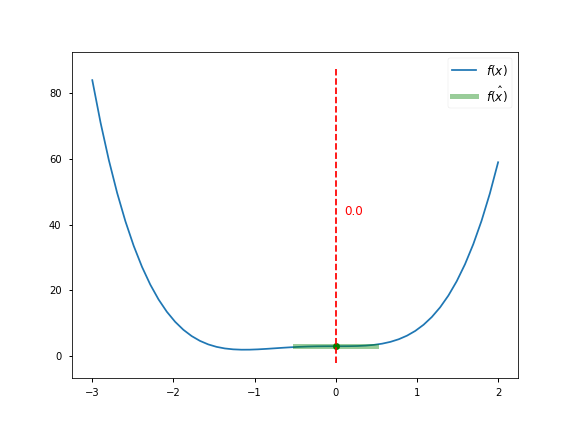
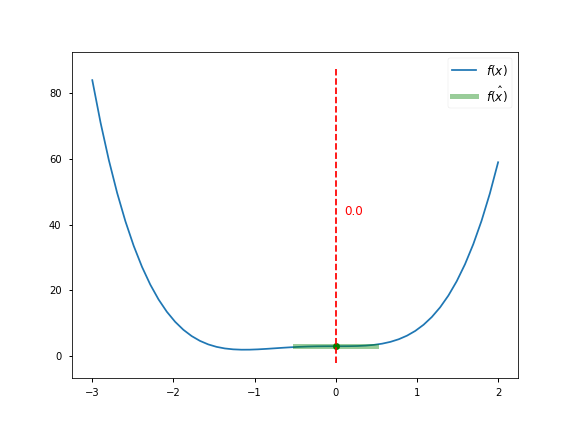
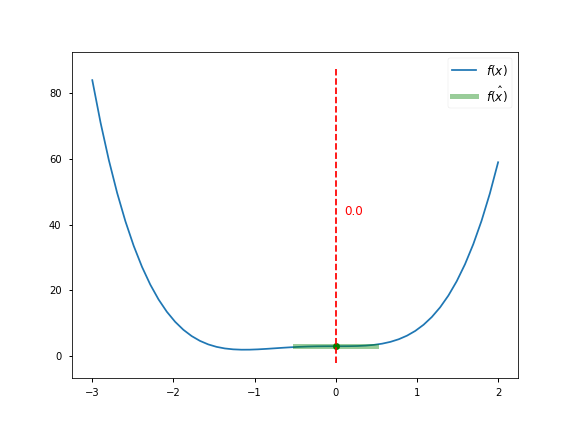
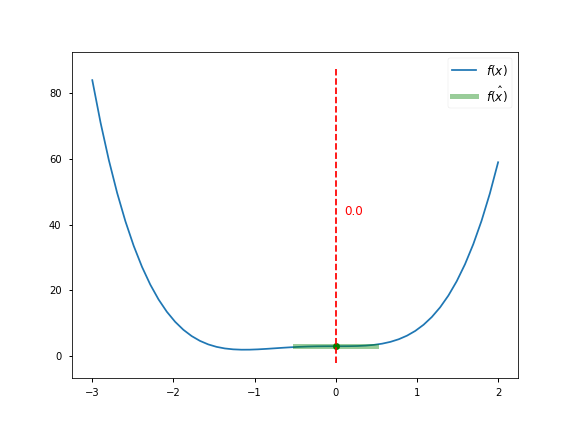
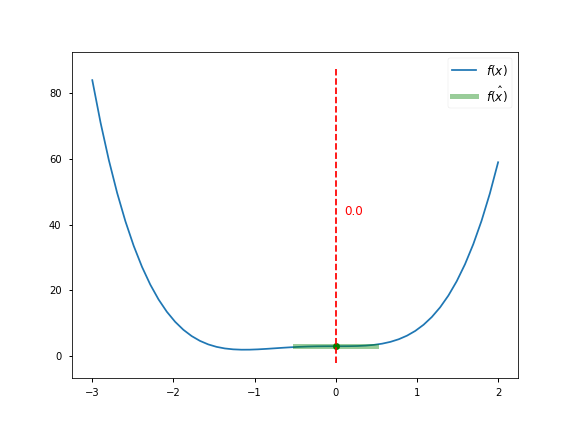
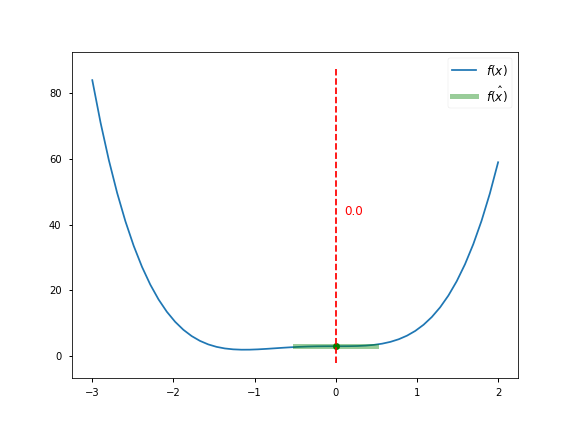

In [38]:
# Initialize the figure and draw f(x)
fig, ax = plt.subplots(figsize=(8,6))
x_range = np.linspace(-3, 2)
ax.plot(x_range,f(x_range))

# Draw and save in global variables the Taylor approximation
dxs = np.linspace(-0.5, 0.5, num=100)                  
taylorCurve = ax.plot(x+dxs, taylorf(x,dxs), 'g-', linewidth=5, alpha=0.4)[0]
spot = ax.plot(x,f(x),'go')[0]         
y0,y1 = plt.ylim()
dashedLine = ax.plot([x,x],[y0,y1],'r--')[0]
text = ax.text(x, (y0+y1)*0.5, str(x), color='r')
ax.legend((r'$f(x)$', r'$\hat{f(x)}$'), fontsize='medium')
  
anim = animation.FuncAnimation(fig, update, generator)
display_animation(anim, default_mode='once')

## Multivariate Optimization

We may wish to find the maximum of a function of several variables:

$$f:\mathbf{R}^k \rightarrow \mathbf{R}$$

Assume:

* first- and second-order partial derivatives exist, and are everywhere continuous.

$$\begin{align}
\mathbf{x} &= (x_1, x_2, \ldots, x_k) \cr
&= x_1 \mathbf{e}_1 + x_2 \mathbf{e}_2, + \ldots + x_k \mathbf{e}_k
\end{align}$$

where $\mathbf{e}_i$ is the coordinate vector of element $i$.

Denote the $i$th partial derivative with respect to $x_i$ as $f_i(x)=\frac{\partial f(\mathbf{x})}{\partial x_i}$.

And we define the *gradient*:

$$\nabla f(\mathbf{x}) = (f_1(\mathbf{x}), \ldots, f_k(\mathbf{x}))'$$

And the *hessian*:

$$H(\mathbf{x})  = \left(
\begin{array}{c}
  \frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_k}  \cr
  \vdots & \ddots & \vdots \cr
  \frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_k}
\end{array}\right)$$

### Curvature

For any vector other than $\mathbf{0}$, the *slope* at $\mathbf{x}$ in direction $\mathbf{v}$ is given by:

$$\frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||}$$

where $||\mathbf{v}||$ is the *euclidean norm* of $\mathbf{v}$.

$$||\mathbf{v}|| = \sqrt{v_1^2 + \ldots + v_k^2} = \sqrt{\mathbf{v} \cdot \mathbf{v}'}$$

The *curvature* at point $\mathbf{x}$ is:

$$\frac{\mathbf{v}' H(\mathbf{x}) \mathbf{v}}{||\mathbf{v}||^2}$$


$f$ has a local maximum if, for all $i=1,\ldots,k$ and sufficiently small $\epsilon$:

$$f(\mathbf{x} + \epsilon \mathbf{e}_i) \le f(\mathbf{x})$$

provided that:

$$\nabla f(\mathbf{x}) = \mathbf{0} = (0,\ldots,0)'$$

and the slope at $x$ in direction $v$ is $\le 0$ (*necessary* condition). This implies that the Hessian is negative semi-definite.

A *sufficient* condition is that the slope $v$ is $\lt 0$ (negative definite Hessian).

***How do we find the maximum?***

### Steepest Ascent/Descent

The steepest ascent (descent) method is a iterative search algorithm. For a function $f:\mathbf{R}^k \rightarrow \mathbf{R}$ with continuous partial derivatives, we iterate via:

$$\mathbf{x}_{i+1} = \mathbf{x}_i + \alpha \mathbf{v}_{i}^*$$

where:

* $\alpha$ = positive scalar step size
* $\mathbf{v}_{i}^*$ = direction of largest slope at position $i$

$$\mathbf{v}_{i}^* = \text{argmax}_{\mathbf{v}} \frac{\mathbf{v}' \nabla f(\mathbf{x}_i)}{||\mathbf{v}||}$$

Questions:

1. How do we find this direction?
2. How big of a step do we take?

We need to maximize the slope, so consider the partial derivative with respect to $v_i$:

$$\frac{\partial}{\partial v_j} \frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||} = \frac{f_j(\mathbf{x})}{||\mathbf{v}||} - \frac{(\mathbf{v}' \nabla f(\mathbf{x}))v_j}{||\mathbf{v}||^3}$$

Setting this equal to zero, we end up with:

$$v_j \propto f_j(\mathbf{x})$$

which implies that at point $\mathbf{x}$, the direction with the largest slope is $\nabla f(\mathbf{x})$. So, steepest ascent is:

$$\mathbf{x}_{x+1} = \mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i)$$

What is the appropriate step size $\alpha$?

* too large, and we risk over-shooting the maximum
* too small, and the search is inefficient

We want to choose $\alpha$ to maximize:

$$g(\alpha) = f(\mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i))$$

We already know how to optimize univariate functions!

Stopping conditions may include:

* $||\mathbf{x}_i - \mathbf{x}_{i-1}|| \le \epsilon$
* $|f(\mathbf{x}_i) - f(\mathbf{x}_{i-1})| \le \epsilon$
* $||\nabla f(\mathbf{x}_i)|| \le \epsilon$

for some small tolerance value $\epsilon$.

### Pseudocode

Putting it all together, our steepest ascent algorithm should look something like this:

1. Initialize $\mathbf{x}_0$ and $\mathbf{x}_1$
2. Initialize counter $i=1$
3. While $f(\mathbf{x}_i) - f(\mathbf{x}_{i-1}) \gt \epsilon$:

    * $\mathbf{x}_{i-1} \leftarrow \mathbf{x}_i$
    * Find optimal step size
    * Calculate new $\mathbf{x}_i = \mathbf{x}_{i-1} + \alpha \nabla f(\mathbf{x}_{i-1})$
    * Increment $i$

The function below implements gradient descent in Python, again using a **generator**.

> ### NumPy's class instances
> You may notice the strange `r_` syntax below. This is not a function (notice the square brackets), though it behaves as one. `r_` is a **class instance** that is used to concatenate sequences in a Matlab-like syntax. When indexing using square brackets is used, it calls a `__getitem__` method associated with that class. In this case, `__getitem__` concatenates the values passed, rather than using them as indices. 
> In other words ... this is a HACK.

In [39]:
from scipy import optimize

def gradient_descent(init_loc, f, f_prime, step=None):
    
    x_i, y_i = init_loc

    for i in range(1, 100):
        fxy = (f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if step is None:
            # Compute a step size using a line_search
            step = optimize.line_search(f, f_prime,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)
            step = step[0]
            
        x_i += -step*dx_i
        y_i += -step*dy_i
        
    return x_i, y_i, fxy

As a simple example, we can use gradient descent to find the peak of a quadratic function, with varying conditioning.

> ### Nested functions
> Below is a function that returns two functions. Previously we saw that functions can be passed as arguments to other functions; so too can they be created and returned by other functions. Here, we are doing this because the functions need to be parameterized before they are used. 

In [40]:
def quad(epsilon, ndim=2):
    
    def f(x):
        y = np.array(x)*np.power(epsilon, np.arange(ndim))
        return .33*np.sum(y**2)

    def f_prime(x):
        scaling = np.power(epsilon, np.arange(ndim))
        y = np.array(x)*scaling
        return .33*2*scaling*y

    return f, f_prime

We specify an initial guess at the minimum, and run our gradient descent algorithm:

In [41]:
x0, y0 = 1.6, 1.1
f, f_prime = quad(0.8)

In [42]:
f_prime((1,1))

array([ 0.66  ,  0.4224])

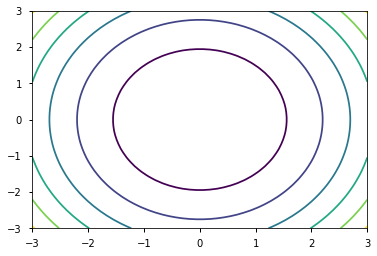

In [43]:
xvals = np.linspace(-3, 3)
yvals = np.linspace(-3, 3)
plt.contour(xvals, yvals, np.array([[f((x,y)) for x in xvals] for y in yvals]))

In [44]:
gradient_descent([x0, y0], f, f_prime)

(-4.5656753980571169e-120, 1.2392182190653183e-49, 3.1611341443311878e-98)

### Exercise

Modify the gradient descent function to store the values generated at each step of the optimization, and provide suitable conditions for stopping, rather than arbitrarily iterating for 100 steps. The function should return a table (call it `gd_output`) of values for x, y, and f((x,y)).

In [45]:
## Write your answer here

In [46]:
def plot_opt(output, f):
    
    all_x_i, all_y_i, all_f_i = output.T
    
    x_min, x_max = -1, 2
    y_min, y_max = 2.25/3*x_min - .2, 2.25/3*x_max - .2
    
    levels = dict()
    
    # A formatter to print values on contours
    def super_fmt(value):
        if value > 1:
            if np.abs(int(value) - value) < .1:
                out = '$10^{%.1i}$' % value
            else:
                out = '$10^{%.1f}$' % value
        else:
            value = np.exp(value - .01)
            if value > .1:
                out = '%1.1f' % value
            elif value > .01:
                out = '%.2f' % value
            else:
                out = '%.2e' % value
        return out
    
    # Plot the contour plot
    if not max(all_y_i) < y_max:
        x_min *= 1.2
        x_max *= 1.2
        y_min *= 1.2
        y_max *= 1.2
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T
    
    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + .01)
    plt.imshow(log_z,
            extent=[x_min, x_max, y_min, y_max],
            cmap=plt.cm.gray_r, origin='lower',
            vmax=log_z.min() + 1.5*log_z.ptp())
    contours = plt.contour(log_z,
                        levels=levels.get(f, None),
                        extent=[x_min, x_max, y_min, y_max],
                        cmap=plt.cm.gnuplot, origin='lower')
    levels[f] = contours.levels
    plt.clabel(contours, inline=1,
                fmt=super_fmt, fontsize=14)
    
    plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
    plt.plot(all_x_i, all_y_i, 'k+')
    
    plt.plot([0], [0], 'rx', markersize=12)
    
    
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [47]:
plot_opt(np.array(gd_output), f)

NameError: name 'gd_output' is not defined

### Nelder-Mead Algorithm

While there are a variety of gradient-based mutlivariate optimization methods at our disposal, for many problems of interest, first and second derivatives may not be available. The **Nelder-Mead simplex algorithm** is an alternative approach that uses direct search instead of gradient ascent. It has a couple of advantages: 

- it does not require derivatives
- it can optimize (minimize) a vector of parameters

It works by refining a simplex, the generalization of intervals and triangles to high-dimensional spaces, to bracket the minimum.

Since it is not based on gradients, Nelder-Mead is robust when the target function is not smooth, though it is slower for smooth functions.

In [ ]:
def rosenbrock(x):
    y = 4*x
    y[0] += 1
    y[1:] += 3
    return np.sum(.5*(1 - y[:-1])**2 + (y[1:] - y[:-1]**2)**2)

SciPy's `fmin` function implements Nelder-Mead.

> ### Callbacks
> Several of SciPy's optimization algorithms implement **callbacks**. A callback is a function that is passed as an argument to another function, which is expected to call back (execute) the argument at some convenient time. Here, this allows us to keep track of intermediate values in the optimization.

In [ ]:
from scipy import optimize

def nelder_mead(f, x0):
    output = []
    
    def store(X):
        output.append([X[0], X[1], f(X)])
        
    optimize.fmin(f, x0, callback=store, ftol=1e-12)
    
    return np.array(output)

In [ ]:
nm_output = nelder_mead(rosenbrock, np.array([x0, y0]))

In [ ]:
plot_opt(nm_output, rosenbrock)

### Example: truncated distribution

Suppose that we observe $Y$ truncated below at $a$ (where $a$ is known). If $X$ is the distribution of our observation, then:

$$ P(X \le x) = P(Y \le x|Y \gt a) = \frac{P(a \lt Y \le x)}{P(Y \gt a)}$$

(so, $Y$ is the original variable and $X$ is the truncated variable) 

Then X has the density:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

Suppose $Y \sim N(\mu, \sigma^2)$ and $x_1,\ldots,x_n$ are independent observations of $X$. We can use maximum likelihood to find $\mu$ and $\sigma$. 

First, we can simulate a truncated distribution using a `while` statement to eliminate samples that are outside the support of the truncated distribution.

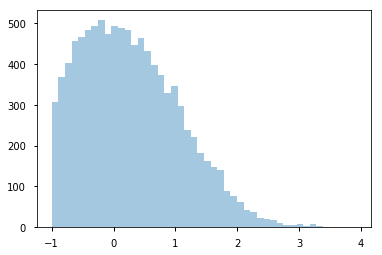

In [48]:
x = np.random.normal(size=10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a
    
sns.distplot(x, kde=False)

We can construct a log likelihood for this function using the conditional form:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

In [49]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(np.log(norm.pdf(x, theta[0], theta[1])) - 
            np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

In [50]:
optimize.fmin(trunc_norm, np.array([1,2]), args=(-1, x))

Optimization terminated successfully.
         Current function value: 10999.915785
         Iterations: 46
         Function evaluations: 87


array([-0.01411666,  1.00337856])

In general, simulating data is a terrific way of testing your model before using it with real data.

## References

Chapter 2 of [Givens, Geof H.; Hoeting, Jennifer A. (2012-10-09). Computational Statistics (Wiley Series in Computational Statistics)](http://www.stat.colostate.edu/computationalstatistics/)

[Python Scientific Lecture Notes](http://scipy-lectures.github.io)